In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the housing dataset

dataset = '/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/scraped_data_cleaned_Emanuela_22Jul24.csv'
#df_housing = pd.read_json(dataset)
df_housing=pd.read_csv(dataset)

#### Basic Analysis

In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          8485 non-null   int64  
 1   house_type     8485 non-null   object 
 2   house_type_2   8485 non-null   object 
 3   rooms          8485 non-null   int64  
 4   m2             8485 non-null   float64
 5   elevator       8485 non-null   int64  
 6   garage         8485 non-null   int64  
 7   neighbourhood  8485 non-null   object 
 8   district       8485 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 596.7+ KB


In [4]:
# List of keywords to check
keywords_housetype = ['Estudio','Dúplex','Casa','flat', 'house', 'building', 'penthouse', 'apartment', 'villa', 'lofts', 'loft', 'land', 'duplex', 'new development', 'homes', 'chalet', 'Piso', 'Property', 'Plot','Ático','Casa']

# Function to extract house type from heading
def extract_house_type(heading):
    heading_lower = heading.lower()
    for keyword in keywords_housetype:
        if keyword.lower() in heading_lower:
            return keyword.capitalize()
    return 'Unknown'

# Apply the function to the heading column and create the HouseType column
df_housing['HouseType'] = df_housing['Title'].apply(extract_house_type)

# Display the DataFrame
df_housing.head(1)

,Title,Price,Url,Bedrooms,Area,Full description,Short description,Features,HouseType
0,"Piso en calle de Toledo, Acacias, Madrid",209.995€,/inmueble/105157270/,2 hab.,50 m²,! ATENCION INVERSORES VIVIENDA CON 8% DE RENTA...,! ATENCION INVERSORES VIVIENDA CON 8% DE RENTA...,"[50 m² construidos, 2 habitaciones, 1 baño, Te...",Piso


In [5]:
df_housing['HouseType'].value_counts()

HouseType
Piso       4775
Ático       394
Casa        245
Estudio     241
Chalet      233
Dúplex      232
Villa       134
Land         11
Name: count, dtype: int64

In [6]:
df_housing = df_housing[df_housing['HouseType'] == 'Piso']

In [7]:
df_housing.columns

Index(['Title', 'Price', 'Url', 'Bedrooms', 'Area', 'Full description',
       'Short description', 'Features', 'HouseType'],
      dtype='object')

In [8]:
# Function to clean area column
def clean_area(area_str):
    try:
        # Check if area_str is already float (possibly due to previous conversion)
        if isinstance(area_str, float):
            return None  # Return None for float types

        # Process range case
        if '-' in area_str:
            range_vals = area_str.split('-')
            avg_val = (float(range_vals[0].replace(' m²', '')) + float(range_vals[1].replace(' m²', ''))) / 2
            return avg_val
        else:
            # Otherwise, convert to float after removing ' m2'
            return float(area_str.replace(' m²', ''))
    except (ValueError, AttributeError):
        return None  # Handle any conversion errors gracefully

# Apply cleaning function to area column
df_housing['Area'] = df_housing['Area'].apply(clean_area)

# Drop the original 'area' column
#df_housing.drop(columns=['Area'], inplace=True)

# Display the updated DataFrame
df_housing.head(1)

,Title,Price,Url,Bedrooms,Area,Full description,Short description,Features,HouseType
0,"Piso en calle de Toledo, Acacias, Madrid",209.995€,/inmueble/105157270/,2 hab.,50.0,! ATENCION INVERSORES VIVIENDA CON 8% DE RENTA...,! ATENCION INVERSORES VIVIENDA CON 8% DE RENTA...,"[50 m² construidos, 2 habitaciones, 1 baño, Te...",Piso


In [9]:
df_housing['Price'] = df_housing['Price'].str.replace('€', '').str.replace('from', '').str.strip()


In [10]:
df_housing['Title'].head(10)

0              Piso en calle de Toledo, Acacias, Madrid
1     Piso en calle de Carlos Arniches, Lavapiés-Emb...
3     Piso en calle de la Ballesta, Malasaña-Univers...
4             Piso en calle de Samaniego, Rejas, Madrid
5                            Piso en Castellana, Madrid
6     Piso en calle de Don Ramón de la Cruz, Goya, M...
7             Piso en calle de Fortuny, Almagro, Madrid
9                Piso en calle de Ocaña, Aluche, Madrid
10     Piso en calle Serafín de Asís, 7, Lucero, Madrid
11            Piso en calle Amposta, 2, Amposta, Madrid
Name: Title, dtype: object

In [11]:
import re

# Function to extract the substring
def extract_location(title):
    pattern = r',\s*([^,]+),\s*Madrid'
    match = re.search(pattern, title)
    if match:
        return match.group(1).strip()
    return None

# Apply the function to the 'Title' column
df_housing['Location'] = df_housing['Title'].apply(extract_location)

# Display the DataFrame
df_housing.head()


,Title,Price,Url,Bedrooms,Area,Full description,Short description,Features,HouseType,Location
0,"Piso en calle de Toledo, Acacias, Madrid",209.995,/inmueble/105157270/,2 hab.,50.0,! ATENCION INVERSORES VIVIENDA CON 8% DE RENTA...,! ATENCION INVERSORES VIVIENDA CON 8% DE RENTA...,"[50 m² construidos, 2 habitaciones, 1 baño, Te...",Piso,Acacias
1,"Piso en calle de Carlos Arniches, Lavapiés-Emb...",209.995,/inmueble/105129078/,2 hab.,50.0,! ATENCION INVERSORES VIVIENDA CON 8% DE RENTA...,! ATENCION INVERSORES VIVIENDA CON 8% DE RENTA...,"[50 m² construidos, 2 habitaciones, 1 baño, Te...",Piso,Lavapiés-Embajadores
3,"Piso en calle de la Ballesta, Malasaña-Univers...",290.000,/inmueble/103865983/,1 hab.,50.0,MAGNÍFICO PISO EN VENTA EN LA CONFLUENCIA DE M...,MAGNÍFICO PISO EN VENTA EN LA CONFLUENCIA DE M...,"[50 m² construidos, 45 m² útiles, 1 habitación...",Piso,Malasaña-Universidad
4,"Piso en calle de Samaniego, Rejas, Madrid",176.000,/inmueble/104558678/,1 hab.,50.0,GPHOME VENDE MAGNIFICO APARTAMENTO TURISTICO E...,GPHOME VENDE MAGNIFICO APARTAMENTO TURISTICO E...,"[50 m² construidos, 1 habitación, 1 baño, Plaz...",Piso,Rejas
5,"Piso en Castellana, Madrid",439.000,/inmueble/104264102/,1 hab.,50.0,MAGNÍFICO APARTAMENTO CON REFORMA INTEGRAL A E...,MAGNÍFICO APARTAMENTO CON REFORMA INTEGRAL A E...,"[50 m² construidos, 1 habitación, 1 baño, Segu...",Piso,None


In [12]:
df_housing[df_housing['Location'].isna()]

,Title,Price,Url,Bedrooms,Area,Full description,Short description,Features,HouseType,Location
5,"Piso en Castellana, Madrid",439.000,/inmueble/104264102/,1 hab.,50.0,MAGNÍFICO APARTAMENTO CON REFORMA INTEGRAL A E...,MAGNÍFICO APARTAMENTO CON REFORMA INTEGRAL A E...,"[50 m² construidos, 1 habitación, 1 baño, Segu...",Piso,None
22,"Piso en Buena Vista, Madrid",148.000,/inmueble/105372898/,2 hab.,52.0,CARABANCHEL ALTO;RP/ Gestoría inmobiliaria tie...,CARABANCHEL ALTO;\nRP/ Gestoría inmobiliaria t...,"[52 m² construidos, 2 habitaciones, 1 baño, Te...",Piso,None
27,"Piso en Lista, Madrid",1.985.000,/inmueble/105236758/,3 hab.,160.0,Moro Real Estate presenta este espectacular in...,Moro Real Estate presenta este espectacular in...,"[160 m² construidos, 3 habitaciones, 3 baños, ...",Piso,None
28,"Piso en El Viso, Madrid",3.100.000,/inmueble/104639787/,4 hab.,250.0,Ibcasas les presenta en exclusiva este especta...,Ibcasas les presenta en exclusiva este especta...,"[250 m² construidos, 4 habitaciones, 4 baños, ...",Piso,None
30,"Piso en Recoletos, Madrid",1.450.000,/inmueble/104553935/,3 hab.,117.0,Maravilloso apartamento reformado en Recoletos...,Maravilloso apartamento reformado en Recoletos...,"[117 m² construidos, 3 habitaciones, 3 baños, ...",Piso,None
...,...,...,...,...,...,...,...,...,...,...
6228,"Piso en Aluche, Madrid",313.000,/inmueble/105526912/,2 hab.,94.0,Imagínate despertar cada mañana en la última p...,Imagínate despertar cada mañana en la última p...,"[94 m² construidos, 85 m² útiles, 2 habitacion...",Piso,None
6238,"Piso en Goya, Madrid",1.420.000,/inmueble/105459277/,4 hab.,181.0,Vivienda en GoyaImagínate caminando por las el...,Vivienda en Goya\nImagínate caminando por las ...,"[181 m² construidos, 4 habitaciones, 2 baños, ...",Piso,None
6240,"Piso en Nueva España, Madrid",799.000,/inmueble/105458862/,2 hab.,145.0,None,,"[145 m² construidos, 129 m² útiles, 2 habitaci...",Piso,None
6248,"Piso en El Viso, Madrid",1.150.000,/inmueble/104326559/,4 hab.,150.0,ÚNICA Inmobiliaria Chamartín les ofrece esta e...,ÚNICA Inmobiliaria Chamartín les ofrece esta e...,"[150 m² construidos, 4 habitaciones, 2 baños, ...",Piso,None


In [13]:
#df_housing.dropna(inplace=True)

In [14]:
list(df_housing['Features'].head(1))

[['50 m² construidos',
  '2 habitaciones',
  '1 baño',
  'Terraza',
  'Segunda mano/buen estado',
  'Calefacción individual: Eléctrica',
  'Bajo interior',
  'Con ascensor',
  'En trámite']]

In [15]:
df_housing.columns

Index(['Title', 'Price', 'Url', 'Bedrooms', 'Area', 'Full description',
       'Short description', 'Features', 'HouseType', 'Location'],
      dtype='object')

In [16]:
df_housing = df_housing[['Price', 'Bedrooms', 'Area', 'HouseType', 'Location']]
df_housing.head()

,Price,Bedrooms,Area,HouseType,Location
0,209.995,2 hab.,50.0,Piso,Acacias
1,209.995,2 hab.,50.0,Piso,Lavapiés-Embajadores
3,290.000,1 hab.,50.0,Piso,Malasaña-Universidad
4,176.000,1 hab.,50.0,Piso,Rejas
5,439.000,1 hab.,50.0,Piso,None


In [17]:
# Function to extract only numbers from the string
def extract_numbers(value):
    match = re.search(r'(\d+)', value)
    if match:
        return int(match.group(1))
    return None

# Apply the function to the 'Bedroom' column
df_housing['Bedrooms'] = df_housing['Bedrooms'].apply(extract_numbers)

df_housing.head()

,Price,Bedrooms,Area,HouseType,Location
0,209.995,2,50.0,Piso,Acacias
1,209.995,2,50.0,Piso,Lavapiés-Embajadores
3,290.000,1,50.0,Piso,Malasaña-Universidad
4,176.000,1,50.0,Piso,Rejas
5,439.000,1,50.0,Piso,None


In [18]:
df_housing['Area'].nunique()

389

In [19]:
# Function to clean and convert price to numeric
def clean_price(price_str):
    # Remove dots and commas, then convert to float
    cleaned_str = re.sub(r'[.\,]', '', price_str)
    try:
        return float(cleaned_str)
    except ValueError:
        return None  # Handle conversion errors gracefully

# Apply the function to the 'Price' column
df_housing['Price'] = df_housing['Price'].apply(clean_price)

In [20]:
df_housing.head()

,Price,Bedrooms,Area,HouseType,Location
0,209995.0,2,50.0,Piso,Acacias
1,209995.0,2,50.0,Piso,Lavapiés-Embajadores
3,290000.0,1,50.0,Piso,Malasaña-Universidad
4,176000.0,1,50.0,Piso,Rejas
5,439000.0,1,50.0,Piso,None


#### Advanced Analysis and Feature Rngineering

In [21]:
df_housing.shape

(4775, 5)

In [22]:
#df_housing.drop_duplicates(inplace=True)

In [23]:
df_housing.dropna(inplace=True)

In [24]:
df_housing.shape

(3558, 5)

<Axes: >

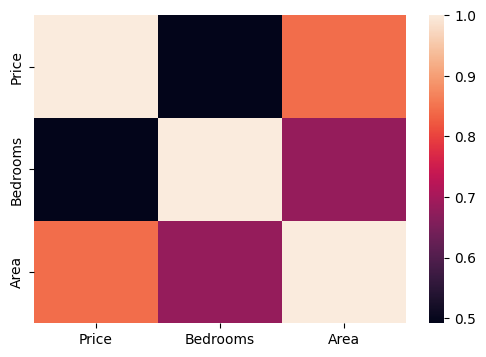

In [25]:
numeric_cols = df_housing.select_dtypes(include=['float64','int64']).columns
df_housing[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_housing[numeric_cols].corr())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


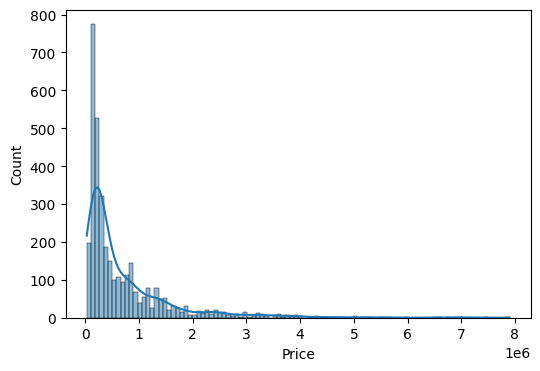

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df_housing['Price'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


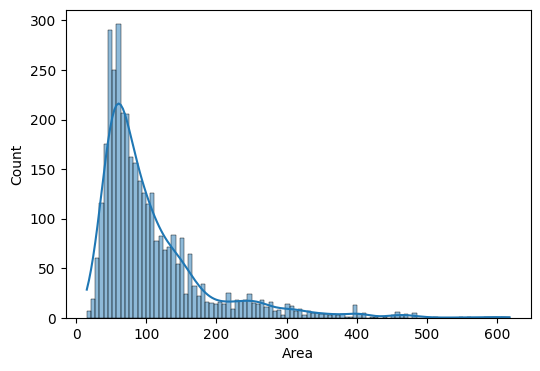

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df_housing['Area'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


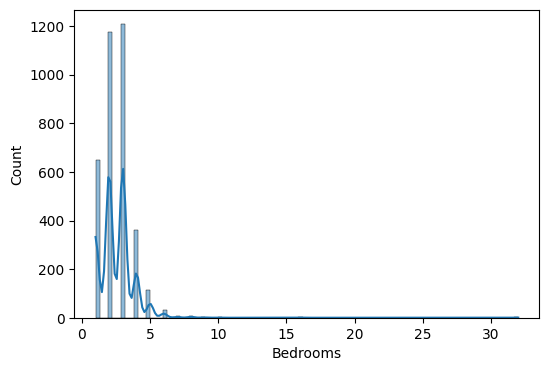

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df_housing['Bedrooms'],bins=100, kde=True)
plt.show()

#### Visualizing each feature vs price

In [29]:
df_housing[df_housing['Area']>0]

,Price,Bedrooms,Area,HouseType,Location
0,209995.0,2,50.0,Piso,Acacias
1,209995.0,2,50.0,Piso,Lavapiés-Embajadores
3,290000.0,1,50.0,Piso,Malasaña-Universidad
4,176000.0,1,50.0,Piso,Rejas
6,1129000.0,2,105.0,Piso,Goya
...,...,...,...,...,...
6255,95200.0,3,73.0,Piso,Numancia
6256,83700.0,2,64.0,Piso,Comillas
6259,89100.0,3,67.0,Piso,Campamento
6260,195000.0,3,145.0,Piso,San Diego


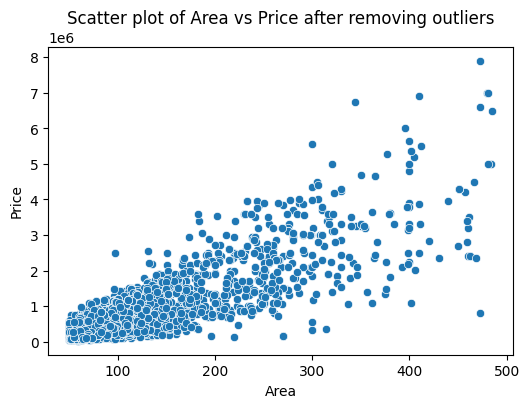

In [30]:


# Remove outliers
df_housing = df_housing[(df_housing['Area'] >= 50) & (df_housing['Area'] <= 500)]

# Plot the data after removing outliers
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='Area',
    y='Price',
    data=df_housing)
plt.title('Scatter plot of Area vs Price after removing outliers')
plt.show()


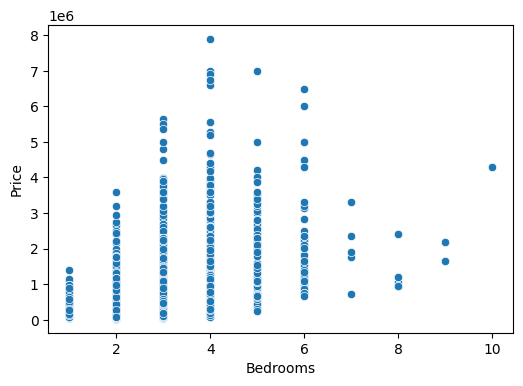

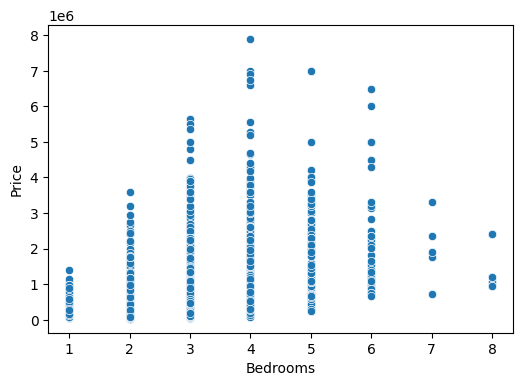

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'Bedrooms',
    y = 'Price',
    data= df_housing)
plt.show()

# Remove outliers
df_housing = df_housing[(df_housing['Bedrooms'] <= 8)]


plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'Bedrooms',
    y = 'Price',
    data= df_housing)
plt.show()

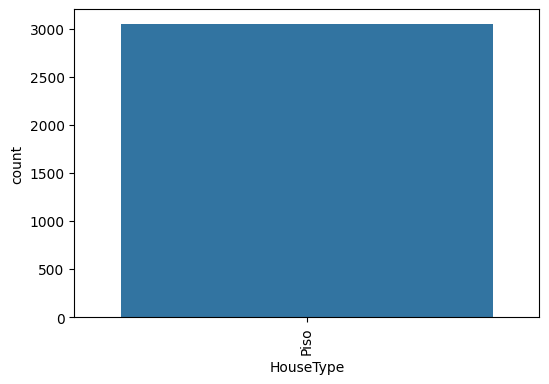

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='HouseType',data=df_housing)
plt.xticks(rotation = 90)
plt.show()

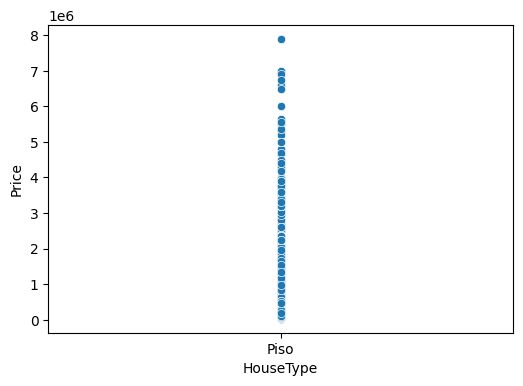

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'HouseType',
    y = 'Price',
    data= df_housing)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


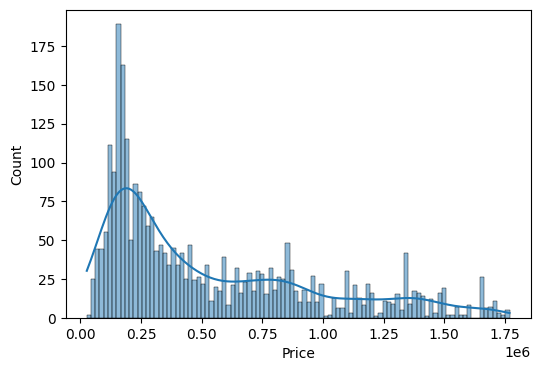

In [34]:
q = df_housing['Price'].quantile(0.9)

df_housing = df_housing[df_housing['Price']<q]

plt.figure(figsize=(6,4))
sns.histplot(df_housing['Price'],bins=100, kde=True)
plt.show()

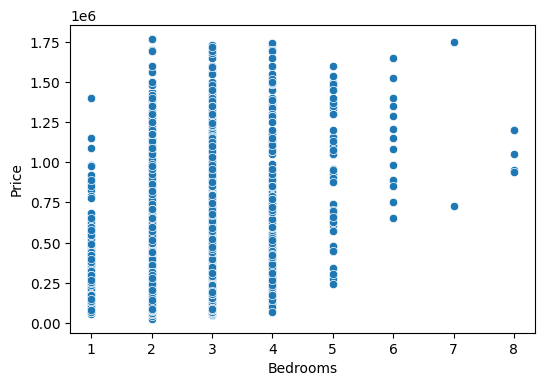

In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'Bedrooms',
    y = 'Price',
    data= df_housing)
plt.show()

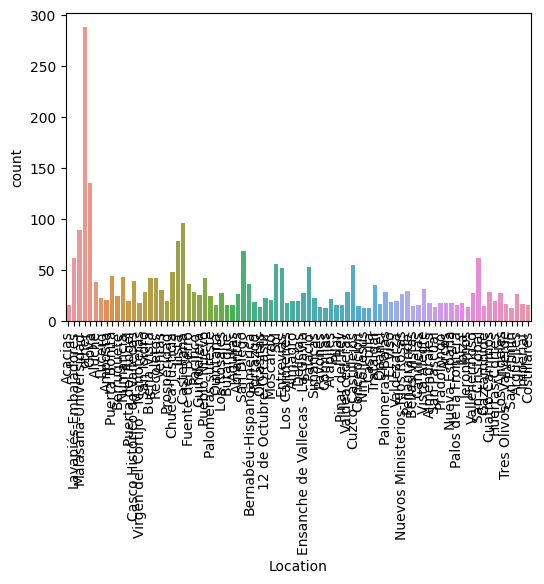

In [36]:
# Calculate the value counts
location_counts = df_housing['Location'].value_counts()

# Identify locations with a count less than 10
locations_to_replace = location_counts[location_counts <= 10].index

# Replace these locations with 'other'
df_housing['Location'] = df_housing['Location'].apply(lambda x: 'other' if x in locations_to_replace else x)

plt.figure(figsize=(6,4))
sns.countplot(x='Location',data=df_housing)
plt.xticks(rotation = 90)
plt.show()

In [37]:
df_housing.shape

(2747, 5)

In [38]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_housing, test_size=0.1)

In [39]:
train_df.shape

(2472, 5)

In [40]:
#pip install shap

In [41]:
from pycaret.regression import *

In [42]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=train_df,
    #test_data=test_data,
    target = 'Price',
    session_id=9,
    ignore_features=[],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    multicollinearity_threshold = 0.9,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore',
    #pca=True,
    #pca_components='mle',
    log_data=False,
    log_experiment=False
    )

best_models = compare_models(cross_validation=True,
                             n_select=3,
                             )

,Description,Value
0,Session id,9
1,Target,Price
2,Target type,Regression
3,Original data shape,"(2472, 5)"
4,Transformed data shape,"(2472, 5)"
5,Transformed train set shape,"(1730, 5)"
6,Transformed test set shape,"(742, 5)"
7,Numeric features,2
8,Categorical features,2
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,103965.6910,25103463794.6204,158023.7286,0.8637,0.3226,0.2687,0.2080
gbr,Gradient Boosting Regressor,106922.6759,25438419486.4178,159187.1404,0.8620,0.3309,0.2807,0.0290
rf,Random Forest Regressor,102586.1175,25823893723.4637,160370.7260,0.8598,0.3315,0.2672,0.0400
et,Extra Trees Regressor,103461.4718,27143879144.4286,164291.0663,0.8529,0.3447,0.2716,0.0300
knn,K Neighbors Regressor,113691.0516,29404034662.4000,170850.3594,0.8411,0.3540,0.2986,0.0090
ada,AdaBoost Regressor,132057.1318,32769922914.2407,180727.0454,0.8229,0.4089,0.3940,0.0140
dt,Decision Tree Regressor,125536.9090,41824397307.1781,204387.6226,0.7730,0.4161,0.3177,0.0090
ridge,Ridge Regression,173468.7362,49394884792.7368,222110.0977,0.7323,0.6502,0.6407,0.0080
llar,Lasso Least Angle Regression,173468.7033,49394009781.3908,222108.1120,0.7323,0.6483,0.6409,0.0080
lar,Least Angle Regression,173468.6483,49393999303.3266,222108.0888,0.7323,0.6483,0.6409,0.0090


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

In [97]:
best_model = stack_models(best_models, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,99039.5461,20995951540.3214,144899.7983,0.8898,0.3211,0.2533
1,98994.1582,21024835671.6610,144999.4333,0.8711,0.3482,0.2987
2,109480.7997,29478261555.0980,171692.3457,0.8429,0.2990,0.2383
3,94212.4044,20298700375.8151,142473.5076,0.8951,0.3353,0.2814
4,90565.2783,17570137038.5571,132552.3936,0.9019,0.2975,0.2414
5,104686.7608,24206609314.2067,155584.7336,0.8734,0.3272,0.2827
6,94612.3380,21652793093.1431,147148.8807,0.8874,0.2978,0.2396
7,88856.4187,18270735377.5832,135169.2841,0.8868,0.2876,0.2385
8,102984.0825,26774460540.8539,163629.0333,0.8495,0.3192,0.2582


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [98]:
#et = create_model('et')
#lbgm = create_model('lightgbm')

In [99]:
# ensemble with bagging
#ensemble_model_ = ensemble_model(et, method = 'Bagging')

In [100]:
# ensemble with boosting
#ensemble_model_ = ensemble_model(et, method = 'Boosting')

In [101]:
# blend top 3 models
#blend_model_ = blend_models(best_models)

##### Prediction on test dataset

In [102]:
test_pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,99418.4045,24333883412.3044,155993.2159,0.8723,0.3004,0.2429


##### Prediction on unseen dataset (held out before the pycaret setup)

In [103]:
unseen_pred = predict_model(best_model, data=test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,92912.0245,19366840726.0130,139164.7970,0.9005,0.3189,0.2618


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

def calculate_metrics(df, target, prediction):
    """
    Calculate various regression metrics.
    
    Parameters:
    df (DataFrame): The DataFrame containing the actual and predicted values.
    target (str): The name of the column containing the actual values.
    prediction (str): The name of the column containing the predicted values.
    
    Returns:
    dict: A dictionary containing MAE, RMSE, R2, and NRMSE.
    """
    actual_values = df[target]
    predicted_values = df[prediction]
    
    mae = mean_absolute_error(actual_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    r2 = explained_variance_score(actual_values, predicted_values)
    nrmse = rmse / (max(predicted_values) - min(predicted_values))
    
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'NRMSE': nrmse}

def plot_predictions(df, target, prediction):
    
    plt.figure(figsize=(6, 4))
    plt.scatter(df[target], df[prediction], label='Predictions')
    plt.plot(df[target], df[target], color='r', label='Perfect Fit Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.title('Actual vs Predicted Values')
    plt.show()

def describe_difference(df, target, prediction):
  
    df['difference'] = abs(df[target] - df[prediction])
    return df[[target, prediction, 'difference']].describe()

def analyze_predictions(df, target, prediction):
 
    # Calculate metrics
    metrics = calculate_metrics(df, target, prediction)
    print('Metrics:')
    for metric, value in metrics.items():
        print(f'{metric}: {value}')
    
    # Describe differences
    description = describe_difference(df, target, prediction)
    print('\nDescriptive Statistics of Differences:')
    print(description)
    
    # Plot predictions
    plot_predictions(df, target, prediction)




Metrics:
MAE: 92912.02452177487
RMSE: 139164.79700704833
R2: 0.900535858740331
NRMSE: 0.09006800914476082

Descriptive Statistics of Differences:
              Price  prediction_label     difference
count  2.750000e+02      2.750000e+02     275.000000
mean   5.241040e+05      5.253472e+05   92912.024522
std    4.420484e+05      4.184466e+05  103794.856928
min    4.060000e+04      8.149795e+04     405.164570
25%    1.694500e+05      1.815427e+05   21606.678628
50%    3.182000e+05      3.372505e+05   57778.039577
75%    7.970000e+05      8.037319e+05  132823.133643
max    1.769000e+06      1.626606e+06  829323.203786


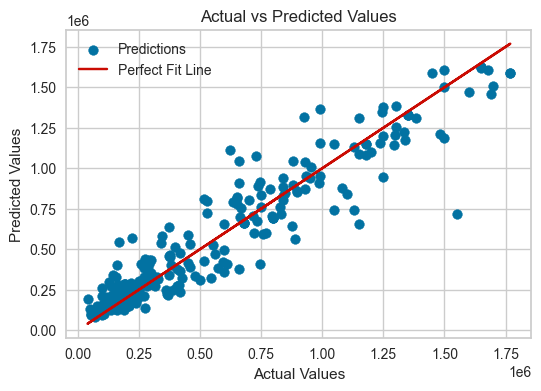

In [105]:
# Example usage:
# Assuming holdout_pred is your DataFrame with 'target' as the actual values and 'prediction' as the predicted values
target = 'Price'
prediction = 'prediction_label'
analyze_predictions(unseen_pred,target,prediction)